In [ ]:
import pandas as pd
df = pd.read_csv('Large Metal Lyrics Archive.csv'

In [ ]:
df

,Artist,Album,Song,Lyric,SongNum,Year,DetectedLanguage,Certainty
0,...AAAARRGHH,aaaarrghh,_Gecenin_G__lgesi,Kara bulutlar sardı yine dünyamı\r\nKış yerleş...,1,0,tr,0.999998
1,...AAAARRGHH,aaaarrghh,_Son___afak,Dolunay parlak görünmüyor bu gece\r\nBenim top...,2,0,tr,0.999998
2,...AAAARRGHH,aaaarrghh,_F__rt__na_Yakla__yyor...,Ay ışığının altında\r\nYalnız bir ruh dolaşır\...,3,0,tr,0.999999
3,...AAAARRGHH,aaaarrghh,_Ebedi_Buzulun_Ortas__nda,Ay ışığının altında\r\nYalnız bir ruh dolaşır\...,4,0,tr,0.999999
4,...AAAARRGHH,aaaarrghh,_Lanetli_Diyarlar,Yürüyorum yalnız başıma\r\nNereye gittiğini bi...,5,0,tr,0.999999
...,...,...,...,...,...,...,...,...
228283,ZYKLON,World Ov Worms,Storm Detonation,Manifestation of the Storm Detonation. \r\nAba...,4,2001,en,0.999994
228284,ZYKLON,World Ov Worms,Zycloned,Stereogothic void - predestination of being. \...,5,2001,en,0.999997
228285,ZYKLON,World Ov Worms,Terrordrome,What can be heard of the sentiment of soilent ...,6,2001,en,0.999998
228286,ZYKLON,World Ov Worms,Worm World,"Planetary sickness, the state of the world. \r...",7,2001,en,0.999996


# **CLEANING THE DATA**

Here I am going to clean the dataset so that:


*   There are no leading or trailing spaces in certain column's data
*   Captialize data entries in certain columns
*   Normalize data entries in "DetechedLanguage" column to lowercase
*   Drop all rows that are instrumental songs.
*   Normalize the lyrics into lowercase
*   Remove rows with missing values







In [ ]:
# Display initial information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228288 entries, 0 to 228287
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            228288 non-null  object 
 1   Album             227962 non-null  object 
 2   Song              227868 non-null  object 
 3   Lyric             200165 non-null  object 
 4   SongNum           228288 non-null  int64  
 5   Year              228288 non-null  int64  
 6   DetectedLanguage  228288 non-null  object 
 7   Certainty         228288 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 13.9+ MB
None


In [ ]:
# Clean the 'Artist', 'Album', 'Song', and 'DetectedLanguage' columns
df['Artist'] = df['Artist'].str.strip().str.title()  # Remove leading/trailing spaces and capitalize
df['Album'] = df['Album'].str.strip().str.title()
df['Song'] = df['Song'].str.strip().str.title()

In [ ]:
# Change "UNKNOWN" to "ins" in DetectedLanguage column
df['DetectedLanguage'] = df['DetectedLanguage'].str.strip().str.lower()  # Normalize language to lowercase
df['DetectedLanguage'] = df['DetectedLanguage'].replace("unknown", "ins")  # Replace "UNKNOWN" with "ins". Here "ins" means that song is an instrumental (and thus no lyrics)

In [ ]:
# Clean the 'Lyric' column
df['Lyric'] = df['Lyric'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove special characters
df['Lyric'] = df['Lyric'].str.lower()  # Convert to lowercase

In [ ]:
# Check for missing values and handle them
print("Missing values before dropping:", df.isnull().sum())
df.dropna(inplace=True)  # Remove rows with missing values

Missing values before dropping: Artist                  0
Album                 326
Song                  420
Lyric               28123
SongNum                 0
Year                    0
DetectedLanguage        0
Certainty               0
dtype: int64


In [ ]:
# Drop rows where DetectedLanguage is "ins"
df = df[df['DetectedLanguage'] != 'ins']

In [ ]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [ ]:
# Display cleaned data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199871 entries, 0 to 199870
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Artist            199871 non-null  object 
 1   Album             199871 non-null  object 
 2   Song              199871 non-null  object 
 3   Lyric             199871 non-null  object 
 4   SongNum           199871 non-null  int64  
 5   Year              199871 non-null  int64  
 6   DetectedLanguage  199871 non-null  object 
 7   Certainty         199871 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.2+ MB
None


In [ ]:
df

,Artist,Album,Song,Lyric,SongNum,Year,DetectedLanguage,Certainty
0,...Aaaarrghh,Aaaarrghh,_Gecenin_G__Lgesi,kara bulutlar sard yine dnyam\r\nk yerleti ruh...,1,0,tr,0.999998
1,...Aaaarrghh,Aaaarrghh,_Son___Afak,dolunay parlak grnmyor bu gece\r\nbenim toprak...,2,0,tr,0.999998
2,...Aaaarrghh,Aaaarrghh,_F__Rt__Na_Yakla__Yyor...,ay nn altnda\r\nyalnz bir ruh dolar\r\nsouk or...,3,0,tr,0.999999
3,...Aaaarrghh,Aaaarrghh,_Ebedi_Buzulun_Ortas__Nda,ay nn altnda\r\nyalnz bir ruh dolar\r\nsouk or...,4,0,tr,0.999999
4,...Aaaarrghh,Aaaarrghh,_Lanetli_Diyarlar,yryorum yalnz bama\r\nnereye gittiini bilmedii...,5,0,tr,0.999999
...,...,...,...,...,...,...,...,...
199866,Zyklon,World Ov Worms,Storm Detonation,manifestation of the storm detonation \r\naban...,4,2001,en,0.999994
199867,Zyklon,World Ov Worms,Zycloned,stereogothic void predestination of being \r\...,5,2001,en,0.999997
199868,Zyklon,World Ov Worms,Terrordrome,what can be heard of the sentiment of soilent ...,6,2001,en,0.999998
199869,Zyklon,World Ov Worms,Worm World,planetary sickness the state of the world \r\n...,7,2001,en,0.999996


# **THEMATIC ANALYSIS**

Here I started to extract common keywords that appeared in a heavy metal song, and analyze their frequencies of showing up in a heavy metal song.

In [ ]:
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import nltk

In [ ]:
# Define themes and associated keywords
themes = {
    'love': ['love', 'heart', 'passion', 'desire', 'brother', 'brotherhood'],
    'anger': ['hate', 'rage', 'anger', 'fury', 'apathy', 'denial', 'cold'],
    'rebellion': ['fight', 'resist', 'rebel', 'defy', 'troops', 'sickle', 'sword'],
    'fantasy': ['dream', 'fantasy', 'myth', 'legend', 'winter', 'gods', 'ancient'],
}

In [ ]:
# Download the 'punkt' resource if not already available
nltk.download('punkt')
nltk.download('stopwords')  # Also download stopwords for keyword extraction

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize a dictionary to hold categorized songs
categorized_songs = defaultdict(list)

In [ ]:
# Tokenize lyrics and categorize songs based on themes
for index, row in df.iterrows():
    lyric_tokens = word_tokenize(row['Lyric'])
    for theme, keywords in themes.items():
        if any(keyword in lyric_tokens for keyword in keywords):
            categorized_songs[theme].append(row['Song'])

In [ ]:
# Display categorized songs by theme
for theme, songs in categorized_songs.items():
    print(f"Theme: {theme}, Songs: {songs}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Keyword Extraction
# Combine all lyrics into a single text for frequency analysis
all_lyrics = " ".join(df['Lyric'])

In [ ]:
# Tokenize and remove stopwords for keyword extraction
stop_words = set(stopwords.words('english'))
all_tokens = [word for word in word_tokenize(all_lyrics.lower()) if word.isalpha() and word not in stop_words]

In [ ]:
# Frequency distribution of words
freq_dist = FreqDist(all_tokens)

In [ ]:
# Display most common words (top 10)
print("Most common words:", freq_dist.most_common(10))

Most common words: [('im', 135921), ('life', 109215), ('time', 104932), ('one', 98964), ('see', 98736), ('never', 91167), ('dont', 90331), ('like', 80903), ('know', 77193), ('die', 75995)]


In [ ]:
# Extract keywords for each theme based on frequency analysis
theme_keywords = {}
for theme, keywords in themes.items():
    theme_keywords[theme] = [keyword for keyword in keywords if keyword in freq_dist]

In [ ]:
print("Theme Keywords:", theme_keywords)

Theme Keywords: {'love': ['love', 'heart', 'passion', 'desire', 'brother', 'brotherhood'], 'anger': ['hate', 'rage', 'anger', 'fury', 'apathy', 'denial', 'cold'], 'rebellion': ['fight', 'resist', 'rebel', 'defy', 'troops', 'sickle', 'sword'], 'fantasy': ['dream', 'fantasy', 'myth', 'legend', 'winter', 'gods', 'ancient']}


# **EMOTIONAL ANALYSIS**

I analyzed the emotion that the lyrics in the dataset carried and put the results in a new column called "Emotions".

In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis using TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

In [ ]:
# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

In [ ]:
def vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # Returns a compound score between -1 (negative) and 1 (positive)

In [ ]:
# Apply sentiment analysis
df['TextBlob_Sentiment'] = df['Lyric'].apply(textblob_sentiment)
df['VADER_Sentiment'] = df['Lyric'].apply(vader_sentiment)

<ipython-input-31-1993936d062e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextBlob_Sentiment'] = df['Lyric'].apply(textblob_sentiment)
<ipython-input-31-1993936d062e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VADER_Sentiment'] = df['Lyric'].apply(vader_sentiment)


In [ ]:
# Categorize sentiment based on VADER compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment_Category'] = df['VADER_Sentiment'].apply(categorize_sentiment)

<ipython-input-32-f5ec58ac90bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Category'] = df['VADER_Sentiment'].apply(categorize_sentiment)


In [ ]:
# Display sentiment analysis results
print(df[['Song', 'TextBlob_Sentiment', 'VADER_Sentiment', 'Sentiment_Category']].head())

                        Song  TextBlob_Sentiment  VADER_Sentiment  \
0          _Gecenin_G__Lgesi                 0.0              0.0   
1                _Son___Afak                 0.0              0.0   
2  _F__Rt__Na_Yakla__Yyor...                 0.0              0.0   
3  _Ebedi_Buzulun_Ortas__Nda                 0.0              0.0   
4          _Lanetli_Diyarlar                 0.0              0.0   

  Sentiment_Category  
0            neutral  
1            neutral  
2            neutral  
3            neutral  
4            neutral  


In [ ]:
# Emotion Classification (using a placeholder approach)
# Define emotion keywords
emotion_keywords = {
    'joy': [
        'happy', 'joy', 'delight', 'pleasure', 'ecstatic', 'blissful', 'content',
        'elated', 'cheerful', 'gleeful', 'jubilant', 'radiant'
    ],
    'sadness': [
        'sad', 'sorrow', 'grief', 'unhappy', 'mournful', 'melancholy',
        'despondent', 'dejected', 'heartbroken', 'woeful', 'forlorn'
    ],
    'anger': [
        'angry', 'rage', 'fury', 'wrath', 'irate', 'enraged',
        'infuriated', 'annoyed', 'indignant', 'resentful', 'hostile'
    ],
    'fear': [
        'afraid', 'fearful', 'terrified', 'anxious', 'apprehensive',
        'panicked', 'scared', 'frightened', 'alarmed'
    ],
    'disgust': [
        'disgusted', 'repulsed', 'revolted', 'nauseated',
        'sickened', 'abhorrent'
    ],
    'surprise': [
        'surprised', 'astonished', 'amazed',
        'startled', 'shocked'
    ]
}

In [ ]:
# Initialize a dictionary to hold emotion classifications
emotion_classifications = []

for index, row in df.iterrows():
    emotions_detected = []
    lyric_tokens = row['Lyric'].split()  # Tokenize lyrics by splitting on spaces
    for emotion, keywords in emotion_keywords.items():
        if any(keyword in lyric_tokens for keyword in keywords):
            emotions_detected.append(emotion)
    emotion_classifications.append(emotions_detected if emotions_detected else ['neutral'])

In [ ]:
df['Emotions'] = emotion_classifications

<ipython-input-37-2a0680ab05fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Emotions'] = emotion_classifications


In [ ]:
# Display emotion classification results
print(df[['Song', 'Emotions']].head())

                        Song   Emotions
0          _Gecenin_G__Lgesi  [neutral]
1                _Son___Afak  [neutral]
2  _F__Rt__Na_Yakla__Yyor...  [neutral]
3  _Ebedi_Buzulun_Ortas__Nda  [neutral]
4          _Lanetli_Diyarlar  [neutral]


In [ ]:
df

,Artist,Album,Song,Lyric,SongNum,Year,DetectedLanguage,Certainty,TextBlob_Sentiment,VADER_Sentiment,Sentiment_Category,Emotions
0,...Aaaarrghh,Aaaarrghh,_Gecenin_G__Lgesi,kara bulutlar sard yine dnyam\r\nk yerleti ruh...,1,0,tr,0.999998,0.000000,0.0000,neutral,[neutral]
1,...Aaaarrghh,Aaaarrghh,_Son___Afak,dolunay parlak grnmyor bu gece\r\nbenim toprak...,2,0,tr,0.999998,0.000000,0.0000,neutral,[neutral]
2,...Aaaarrghh,Aaaarrghh,_F__Rt__Na_Yakla__Yyor...,ay nn altnda\r\nyalnz bir ruh dolar\r\nsouk or...,3,0,tr,0.999999,0.000000,0.0000,neutral,[neutral]
3,...Aaaarrghh,Aaaarrghh,_Ebedi_Buzulun_Ortas__Nda,ay nn altnda\r\nyalnz bir ruh dolar\r\nsouk or...,4,0,tr,0.999999,0.000000,0.0000,neutral,[neutral]
4,...Aaaarrghh,Aaaarrghh,_Lanetli_Diyarlar,yryorum yalnz bama\r\nnereye gittiini bilmedii...,5,0,tr,0.999999,0.000000,0.0000,neutral,[neutral]
...,...,...,...,...,...,...,...,...,...,...,...,...
199866,Zyklon,World Ov Worms,Storm Detonation,manifestation of the storm detonation \r\naban...,4,2001,en,0.999994,0.123864,-0.9217,negative,[neutral]
199867,Zyklon,World Ov Worms,Zycloned,stereogothic void predestination of being \r\...,5,2001,en,0.999997,-0.004394,-0.8207,negative,[joy]
199868,Zyklon,World Ov Worms,Terrordrome,what can be heard of the sentiment of soilent ...,6,2001,en,0.999998,-0.075000,-0.8316,negative,[neutral]
199869,Zyklon,World Ov Worms,Worm World,planetary sickness the state of the world \r\n...,7,2001,en,0.999996,0.044444,-0.9538,negative,[joy]


In [ ]:
from collections import Counter

# Flatten the list of emotions for all songs
all_emotions = [emotion for sublist in df['Emotions'] for emotion in sublist]

# Count occurrences of each emotion
emotion_counts = Counter(all_emotions)

# Display the count of each emotion
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

neutral: 159721
joy: 10025
sadness: 13084
fear: 8733
anger: 11802
disgust: 746
surprise: 796


# **TEMPORAL ANALYSIS**



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Remove entries with Year marked as 0
df = df[df['Year'] != 0]

In [ ]:
# Ensure 'Year' is treated as an integer
df['Year'] = df['Year'].astype(int)

<ipython-input-43-9244a0956aa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


In [ ]:
# Group by Year and calculate average sentiment scores
yearly_sentiment = df.groupby('Year')['VADER_Sentiment'].mean()

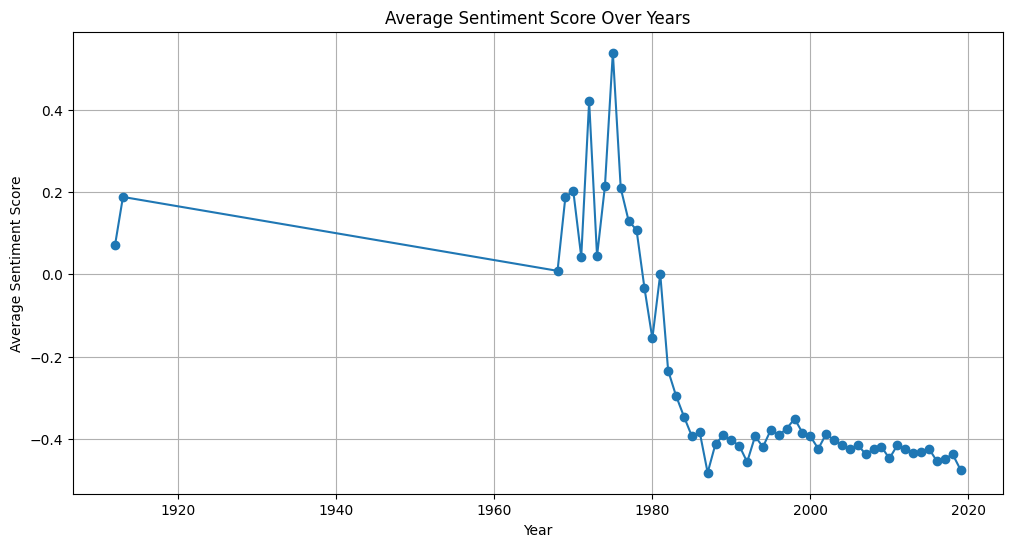

In [ ]:
# Plotting the average sentiment over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiment.index, yearly_sentiment.values, marker='o')
plt.title('Average Sentiment Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In [ ]:
# Count the number of songs per year
songs_per_year = df['Year'].value_counts().sort_index()

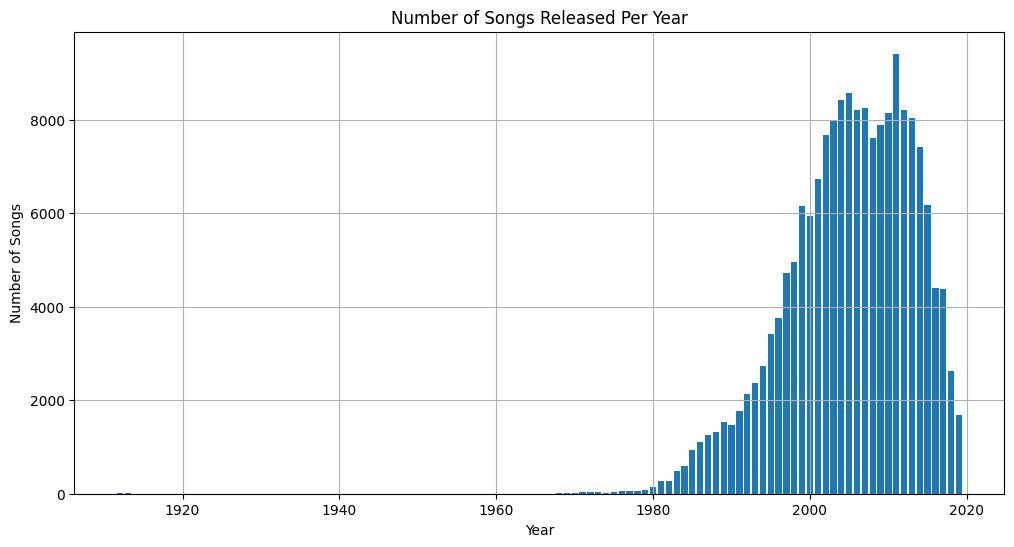

In [ ]:
# Plotting the number of songs released each year
plt.figure(figsize=(12, 6))
plt.bar(songs_per_year.index, songs_per_year.values)
plt.title('Number of Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

# **ARTIST SPECIFIC INSIGHT**

In [ ]:
# Function to calculate average sentiment score per artist
def average_sentiment_by_artist():
    return df.groupby('Artist')['VADER_Sentiment'].mean()

# Calculate average sentiment score for each artist
artist_sentiment = average_sentiment_by_artist()

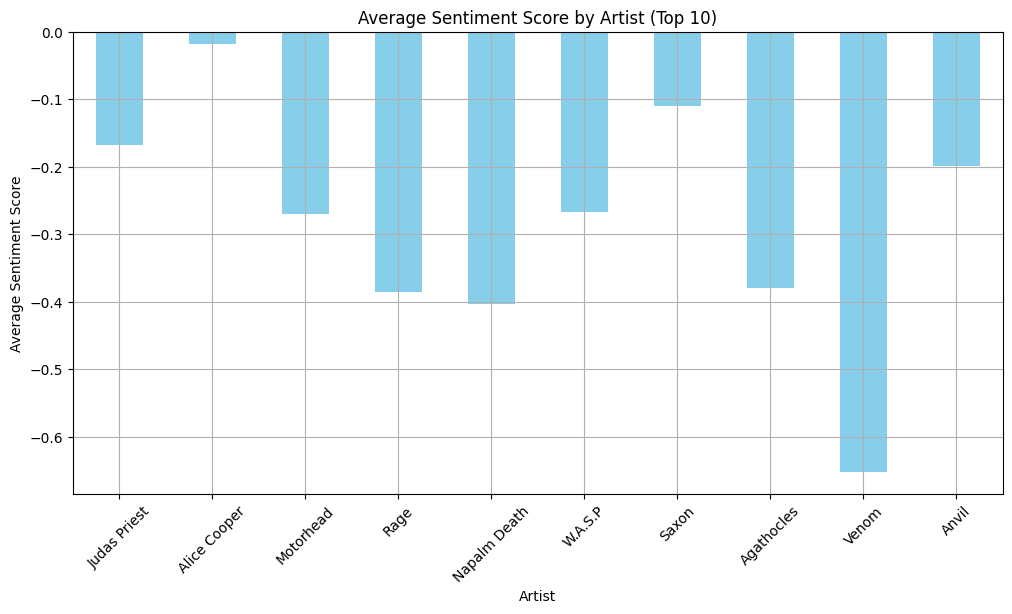

In [ ]:
# Plotting average sentiment score for top 10 artists by number of songs
top_artists = df['Artist'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
artist_sentiment[top_artists].plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Artist (Top 10)')
plt.xlabel('Artist')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Function to count themes per artist
def themes_by_artist():
    artist_themes = {}
    for artist in df['Artist'].unique():
        artist_data = df[df['Artist'] == artist]
        all_emotions = [emotion for sublist in artist_data['Emotions'] for emotion in sublist]
        theme_count = Counter(all_emotions)
        artist_themes[artist] = theme_count
    return artist_themes

# Get theme counts for each artist
artist_themes = themes_by_artist()

Here I tried to analyze a specific artist

In [ ]:
# Display theme counts for a specific artist (e.g., the first one in the list)
specific_artist = "Iron Maiden"
print(f"Theme counts for {specific_artist}: {artist_themes[specific_artist]}")

Theme counts for Iron Maiden: Counter({'neutral': 116, 'fear': 18, 'joy': 12, 'anger': 10, 'sadness': 7, 'surprise': 1})


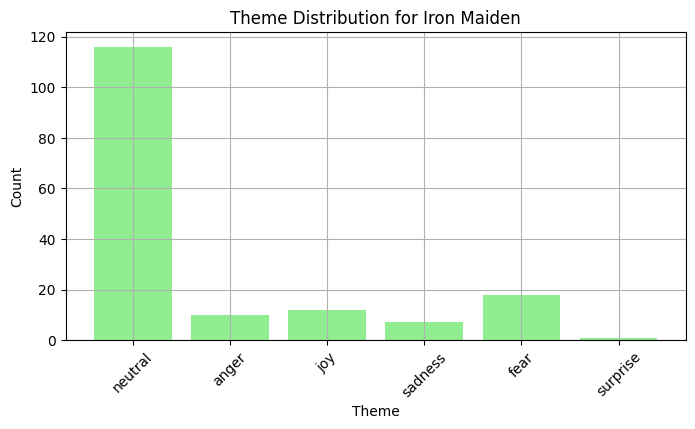

In [ ]:
# Optional: Plot theme distribution for a specific artist
def plot_theme_distribution(specific_artist):
    if specific_artist in artist_themes:
        themes = artist_themes[specific_artist]
        plt.figure(figsize=(8, 4))
        plt.bar(themes.keys(), themes.values(), color='lightgreen')
        plt.title(f'Theme Distribution for {specific_artist}')
        plt.xlabel('Theme')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {specific_artist}")

# Plot theme distribution for a specific artist (replace with desired artist name)
plot_theme_distribution(specific_artist)

# **DOWNLOAD THE ANALYZED RESULTS AS AN CSV**

In [ ]:
df.to_csv('analysis_results.csv', index=False)